In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":15})

In [3]:
df_train = pd.read_csv("df_train_processed.csv")
df_test = pd.read_csv("df_test_processed.csv")

In [4]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [5]:
df_test.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,19,M,161762,0.475616,2.940224e-06,...,0.169929,0.222808,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,-0.260279,-0.566556
1,speech,neutral,normal,Kids are talking by the door,2nd,19,M,155355,0.120148,7.733752e-07,...,0.216928,0.114567,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,-0.428900,-0.587210
2,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,160160,-0.599304,-3.741909e-06,...,0.227178,0.010295,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,0.626916,-0.883317
3,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,158558,-0.080383,-5.069646e-07,...,0.179467,0.241405,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,-0.825144,-0.383701
4,speech,calm,normal,Kids are talking by the door,1st,19,M,176176,0.152222,8.640319e-07,...,0.189124,0.217860,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,-0.536669,-0.547354


## Standardization


## Train

In [6]:
df_train_num = df_train.select_dtypes(include="number").drop('actor', axis=1)
df_train_cat = df_train.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_train_num_scaled = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)
df_train = pd.concat([df_train_num_scaled, df_train_cat], axis=1)

## Test

In [7]:
df_test_num = df_test.select_dtypes(include="number").drop('actor', axis=1)
df_test_cat = df_test.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_test_num_scaled = pd.DataFrame(scaler.fit_transform(df_test_num), columns=df_test_num.columns)
df_test = pd.concat([df_test_num_scaled, df_test_cat], axis=1)

In [8]:
def label_Encoder(array, label):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == label:
            new_array[i] = 1
    return new_array

## Vocal Channel


In [9]:
df_train_model_vc = df_train.copy()

In [10]:
df_test_model_vc = df_test.copy()

In [11]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_vc_fi = df_train_model_vc.drop("vocal_channel", axis=1)
df_train_model_vc_fi = pd.get_dummies(df_train_model_vc_fi)
df_train_model_vc_fi["vocal_channel"] = df_train["vocal_channel"]
df_train_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_train_model_vc_fi['vocal_channel'])

In [12]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_vc_fi = df_test_model_vc.drop("vocal_channel", axis=1)
df_test_model_vc_fi = pd.get_dummies(df_test_model_vc_fi)
df_test_model_vc_fi["vocal_channel"] = df_test["vocal_channel"]
df_test_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_test_model_vc_fi['vocal_channel'])

In [13]:
X_train_vc = df_train_model_vc.drop("vocal_channel", axis=1)
X_train_vc = np.array(pd.get_dummies(X_train_vc))
y_train_vc = label_Encoder(df_train_model_vc["vocal_channel"], 'speech')

In [14]:
X_test_vc = df_test_model_vc.drop("vocal_channel", axis=1)
X_test_vc = np.array(pd.get_dummies(X_test_vc))
y_test_vc = label_Encoder(df_test_model_vc["vocal_channel"], 'speech')

In [15]:
def random_forest(X_train_array, y_train_array):
    
    
    param_grid = {"min_samples_split": loguniform(1e-2, 1e0),
                  "min_samples_leaf": uniform(0.001, 0.2),
                   "max_depth": list(range(2,200)),
                   "criterion": ["gini", "entropy", "log_loss"],
                  'max_features': ['sqrt', 'log2', None],
    }


    clf=RandomForestClassifier(random_state=42,n_estimators = 100,)


    randomforest=RandomizedSearchCV(clf,
                                    param_grid,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=None,
                                    n_iter = 100,
                                    error_score='raise'
                      )


    randomforest.fit(X_train_array,y_train_array)

    return randomforest

In [16]:
randomforest_vocal_channel = random_forest(X_train_vc, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [17]:
print("Tuned Random Forest Parameters: {}".format(randomforest_vocal_channel.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 59, 'max_features': None, 'min_samples_leaf': 0.01636604365343277, 'min_samples_split': 0.030807251967252074}


In [86]:
model_vocal_channel = RandomForestClassifier( 
                                    min_samples_split = 0.030807251967252074, 
                                    min_samples_leaf = 0.01636604365343277, 
                                    max_features = None, 
                                    max_depth = 59,
                                    criterion = 'entropy'
                                    )
model_vocal_channel.fit(X_train_vc,y_train_vc)

RandomForestClassifier(criterion='entropy', max_depth=59, max_features=None,
                       min_samples_leaf=0.01636604365343277,
                       min_samples_split=0.030807251967252074)

In [87]:
y_pred_rf_vc = model_vocal_channel.predict(X_test_vc)

In [88]:
print(classification_report(y_test_vc, y_pred_rf_vc))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       264
         1.0       0.99      0.91      0.95       360

    accuracy                           0.94       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.94      0.94       624



In [168]:
accuracy_vc = accuracy_score(y_test_vc, y_pred_rf_vc)
f1_score_vc = f1_score(y_test_vc, y_pred_rf_vc, average = 'weighted')

In [89]:
def feature_importance(model, train_dataset):

    most_important = model.feature_importances_.argsort()[-10:] 
    imps = model.feature_importances_[most_important]
    vars_ = train_dataset.columns[most_important]
    [print(f"Feature: {var}, Importance: {imp}") for var, imp in zip(vars_, imps)]
    return imps, vars_

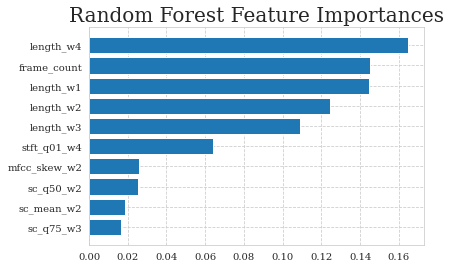

In [90]:
nbr_features = 10
tree_feature_importances = model_vocal_channel.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_vc_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [91]:
X_train_vc_fi = np.array(df_train_model_vc_fi[vars_])
X_test_vc_fi = np.array(df_test_model_vc_fi[vars_])

In [92]:
randomforest_vocal_channel_fi = random_forest(X_train_vc_fi, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [93]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_vocal_channel_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'entropy', 'max_depth': 99, 'max_features': 'log2', 'min_samples_leaf': 0.003008169154338613, 'min_samples_split': 0.028818869219602167}


In [94]:
model_vocal_channel_fi = RandomForestClassifier(min_samples_split = 0.028818869219602167, 
                                    min_samples_leaf = 0.003008169154338613, 
                                    max_features = 'log2', 
                                    max_depth = 99,
                                    criterion = 'entropy'
                                    )
model_vocal_channel_fi.fit(X_train_vc_fi,y_train_vc)

RandomForestClassifier(criterion='entropy', max_depth=99, max_features='log2',
                       min_samples_leaf=0.003008169154338613,
                       min_samples_split=0.028818869219602167)

In [95]:
y_pred_rf_vc_fi = model_vocal_channel_fi.predict(X_test_vc_fi)

In [96]:
print(classification_report(y_test_vc, y_pred_rf_vc_fi))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       264
         1.0       0.98      0.88      0.92       360

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624



## Sex

In [97]:
df_train_model_s = df_train.copy()

In [98]:
df_test_model_s = df_test.copy()

In [99]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_s_fi = df_train_model_s.drop("sex", axis=1)
df_train_model_s_fi = pd.get_dummies(df_train_model_s_fi)
df_train_model_s_fi["sex"] = df_train["sex"]
df_train_model_s_fi["sex"] = label_encoder.fit_transform(df_train_model_s_fi['sex'])

In [100]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_s_fi = df_test_model_s.drop("sex", axis=1)
df_test_model_s_fi = pd.get_dummies(df_test_model_s_fi)
df_test_model_s_fi["sex"] = df_test["sex"]
df_test_model_s_fi["sex"] = label_encoder.fit_transform(df_test_model_s_fi['sex'])

In [101]:
X_train_s = df_train_model_s.drop("sex", axis=1)
X_train_s = np.array(pd.get_dummies(X_train_s))
y_train_s = label_Encoder(df_train_model_s["sex"], 'M')

In [102]:
X_test_s = df_test_model_s.drop("sex", axis=1)
X_test_s = np.array(pd.get_dummies(X_test_s))
y_test_s = label_Encoder(df_test_model_s["sex"], 'M')

In [103]:
randomforest_sex = random_forest(X_train_s, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [104]:
print("Tuned Random Forest Parameters: {}".format(randomforest_sex.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 130, 'max_features': None, 'min_samples_leaf': 0.009467476468607815, 'min_samples_split': 0.043088993983511646}


In [105]:
model_sex = RandomForestClassifier(min_samples_split = 0.043088993983511646, 
                                    min_samples_leaf = 0.009467476468607815, 
                                    max_features = None, 
                                    max_depth = 130,
                                   criterion = 'entropy'
                                   )
model_sex.fit(X_train_s,y_train_s)

RandomForestClassifier(criterion='entropy', max_depth=130, max_features=None,
                       min_samples_leaf=0.009467476468607815,
                       min_samples_split=0.043088993983511646)

In [106]:
y_pred_rf_s = model_sex.predict(X_test_s)

In [107]:
print(classification_report(y_test_s, y_pred_rf_s))

              precision    recall  f1-score   support

         0.0       0.99      0.65      0.79       312
         1.0       0.74      0.99      0.85       312

    accuracy                           0.82       624
   macro avg       0.87      0.82      0.82       624
weighted avg       0.87      0.82      0.82       624



In [174]:
accuracy_s = accuracy_score(y_test_s, y_pred_rf_s)
f1_score_s = f1_score(y_test_s, y_pred_rf_s, average = 'weighted')

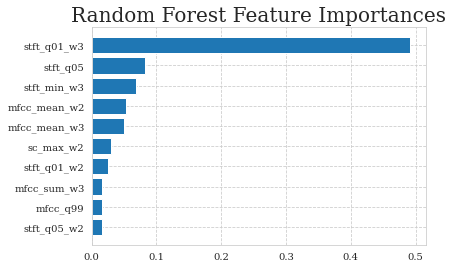

In [199]:
nbr_features = 10
tree_feature_importances = model_sex.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_s_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [109]:
X_train_s_fi = np.array(df_train_model_s_fi[vars_s])
X_test_s_fi = np.array(df_test_model_s_fi[vars_s])

In [110]:
randomforest_sex_fi = random_forest(X_train_s_fi, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [111]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_sex_fi.best_params_))




Tuned Random Forest Parameters after Feature Importance: {'criterion': 'gini', 'max_depth': 194, 'max_features': 'log2', 'min_samples_leaf': 0.016010825656273497, 'min_samples_split': 0.02316720689765622}


In [112]:
model_sex_fi = RandomForestClassifier(min_samples_split = 0.02316720689765622, 
                                    min_samples_leaf = 0.016010825656273497, 
                                    max_features = 'log2', 
                                    max_depth = 194, 
                                    criterion = 'gini'
                                    )
model_sex_fi.fit(X_train_s_fi,y_train_s)

RandomForestClassifier(max_depth=194, max_features='log2',
                       min_samples_leaf=0.016010825656273497,
                       min_samples_split=0.02316720689765622)

In [113]:
y_pred_rf_s_fi = model_sex_fi.predict(X_test_s_fi)

In [114]:
print(classification_report(y_test_s, y_pred_rf_s_fi))

              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82       312
         1.0       0.77      0.99      0.86       312

    accuracy                           0.84       624
   macro avg       0.88      0.84      0.84       624
weighted avg       0.88      0.84      0.84       624



## Emotional Intensity

In [115]:
df_train_model_ei = df_train.copy()

In [116]:
df_test_model_ei = df_test.copy()

In [118]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_ei_fi = df_train_model_ei.drop("emotional_intensity", axis=1)
df_train_model_ei_fi = pd.get_dummies(df_train_model_ei_fi)
df_train_model_ei_fi["emotional_intensity"] = df_train["emotional_intensity"]
df_train_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_train_model_ei_fi['emotional_intensity'])

In [51]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_ei_fi = df_test_model_ei.drop("emotional_intensity", axis=1)
df_test_model_ei_fi = pd.get_dummies(df_test_model_ei_fi)
df_test_model_ei_fi["emotional_intensity"] = df_test["emotional_intensity"]
df_test_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_test_model_ei_fi['emotional_intensity'])

In [52]:
X_train_ei = df_train_model_ei.drop("emotional_intensity", axis=1)
X_train_ei = np.array(pd.get_dummies(X_train_ei))
y_train_ei = label_Encoder(df_train_model_ei["emotional_intensity"], 'normal')

In [53]:
X_train_ei.shape

(1828, 392)

In [54]:
X_test_ei = df_test_model_ei.drop("emotional_intensity", axis=1)
X_test_ei = np.array(pd.get_dummies(X_test_ei))
y_test_ei = label_Encoder(df_test_model_ei["emotional_intensity"], 'normal')

In [117]:
randomforest_emotional_intensity = random_forest(X_train_ei, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [119]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotional_intensity.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 33, 'max_features': None, 'min_samples_leaf': 0.005093610744878773, 'min_samples_split': 0.02412849564423119}


In [120]:
model_emotional_intensity = RandomForestClassifier(min_samples_split = 0.02412849564423119, 
                                    min_samples_leaf = 0.005093610744878773, 
                                    max_features = None, 
                                    max_depth = 33,
                                    criterion = 'gini'
                                   )
model_emotional_intensity.fit(X_train_ei,y_train_ei)

RandomForestClassifier(max_depth=33, max_features=None,
                       min_samples_leaf=0.005093610744878773,
                       min_samples_split=0.02412849564423119)

In [121]:
y_pred_rf_ei = model_emotional_intensity.predict(X_test_ei)

In [122]:
print(classification_report(y_test_ei, y_pred_rf_ei))

              precision    recall  f1-score   support

         0.0       0.72      0.77      0.74       288
         1.0       0.79      0.74      0.76       336

    accuracy                           0.75       624
   macro avg       0.75      0.75      0.75       624
weighted avg       0.76      0.75      0.75       624



In [176]:
accuracy_ei = accuracy_score(y_test_ei, y_pred_rf_ei)
f1_score_ei = f1_score(y_test_ei, y_pred_rf_ei, average = 'weighted')

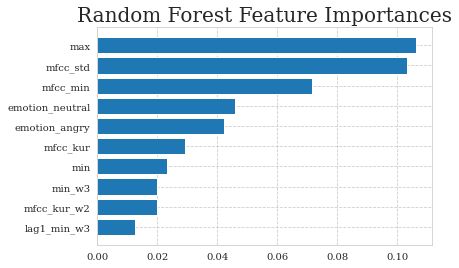

In [200]:
nbr_features = 10
tree_feature_importances = model_emotional_intensity.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [124]:
X_train_ei_fi = np.array(df_train_model_ei_fi[vars_ei])
X_test_ei_fi = np.array(df_test_model_ei_fi[vars_ei])

In [125]:
randomforest_emotional_intensity_fi = random_forest(X_train_ei_fi, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [126]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotional_intensity_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 179, 'max_features': 'sqrt', 'min_samples_leaf': 0.014521388578475534, 'min_samples_split': 0.06735799311008016}


In [127]:
model_emotional_intensity_fi = RandomForestClassifier( 
                                    min_samples_split = 0.06735799311008016, 
                                    min_samples_leaf = 0.014521388578475534, 
                                    max_features = 'sqrt', 
                                    max_depth = 179,
                                    criterion = 'log_loss'
                                    )
model_emotional_intensity_fi.fit(X_train_ei_fi,y_train_ei)

RandomForestClassifier(criterion='log_loss', max_depth=179,
                       min_samples_leaf=0.014521388578475534,
                       min_samples_split=0.06735799311008016)

In [128]:
y_pred_rf_ei_fi = model_emotional_intensity_fi.predict(X_test_ei_fi)

In [129]:
print(classification_report(y_test_ei, y_pred_rf_ei_fi))

              precision    recall  f1-score   support

         0.0       0.69      0.68      0.68       288
         1.0       0.73      0.74      0.73       336

    accuracy                           0.71       624
   macro avg       0.71      0.71      0.71       624
weighted avg       0.71      0.71      0.71       624



## Emotion

In [67]:
def label_encoder_e(array):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == "calm":
            new_array[i] = 1
        elif array[i] == "happy":
            new_array[i] = 2
        elif array[i] == "sad":
            new_array[i] = 3
        elif array[i] == "angry":
            new_array[i] = 4
        elif array[i] == "fearful":
            new_array[i] = 5
        elif array[i] == "disgust":
            new_array[i] = 6
        elif array[i] == "surprised":
            new_array[i] = 7
    return new_array

In [68]:
df_train_model_e = df_train.copy()

In [69]:
df_test_model_e = df_test.copy()

In [70]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_e_fi = df_train_model_e.drop("emotion", axis=1)
df_train_model_e_fi = pd.get_dummies(df_train_model_e_fi)
df_train_model_e_fi["emotion"] = df_train["emotion"]
df_train_model_e_fi["emotion"] = label_encoder.fit_transform(df_train_model_e_fi['emotion'])

In [71]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_e_fi = df_test_model_e.drop("emotion", axis=1)
df_test_model_e_fi = pd.get_dummies(df_test_model_e_fi)
df_test_model_e_fi["emotion"] = df_test["emotion"]
df_test_model_e_fi["emotion"] = label_encoder.fit_transform(df_test_model_e_fi['emotion'])

In [72]:
X_train_e = df_train_model_e.drop("emotion", axis=1)
X_train_e = np.array(pd.get_dummies(X_train_e))
y_train_e = label_encoder_e(df_train_model_e["emotion"])

In [73]:
X_test_e = df_test_model_e.drop("emotion", axis=1)
X_test_e = np.array(pd.get_dummies(X_test_e))
y_test_e = label_encoder_e(df_test_model_ei["emotion"])

In [130]:
randomforest_emotion = random_forest(X_train_e, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [131]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion.best_params_))

Tuned Random Forest Parameters: {'criterion': 'log_loss', 'max_depth': 157, 'max_features': None, 'min_samples_leaf': 0.0018655938251443285, 'min_samples_split': 0.012803609035213152}


In [132]:
model_emotion = RandomForestClassifier(min_samples_split = 0.012803609035213152, 
                                    min_samples_leaf = 0.0018655938251443285, 
                                    max_features = None, 
                                    max_depth = 157,
                                    criterion = 'log_loss'  
                                    )
model_emotion.fit(X_train_e,y_train_e)

RandomForestClassifier(criterion='log_loss', max_depth=157, max_features=None,
                       min_samples_leaf=0.0018655938251443285,
                       min_samples_split=0.012803609035213152)

In [133]:
y_pred_rf_e = model_emotion.predict(X_test_e)

In [134]:
print(classification_report(y_test_e, y_pred_rf_e))

              precision    recall  f1-score   support

         0.0       0.48      0.44      0.46        48
         1.0       0.50      0.59      0.55        96
         2.0       0.37      0.46      0.41        96
         3.0       0.35      0.23      0.28        96
         4.0       0.49      0.82      0.61        96
         5.0       0.60      0.30      0.40        96
         6.0       0.48      0.33      0.40        48
         7.0       0.42      0.38      0.40        48

    accuracy                           0.46       624
   macro avg       0.46      0.44      0.44       624
weighted avg       0.46      0.46      0.44       624



In [179]:
accuracy_e = accuracy_score(y_test_e, y_pred_rf_e)
f1_score_e = f1_score(y_test_e, y_pred_rf_e, average = 'weighted')

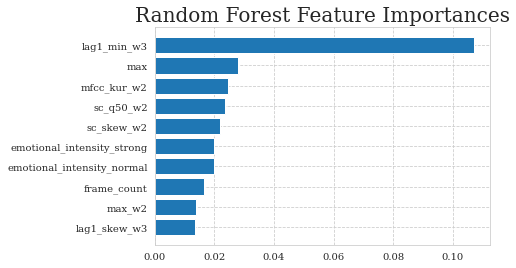

In [201]:
nbr_features = 10
tree_feature_importances = model_emotion.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_e_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [136]:
X_train_e_fi = np.array(df_train_model_e_fi[vars_e])
X_test_e_fi = np.array(df_test_model_e_fi[vars_e])

In [137]:
randomforest_emotion_fi = random_forest(X_train_e_fi, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [138]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_fi.best_params_))


Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 185, 'max_features': 'sqrt', 'min_samples_leaf': 0.012981547894104151, 'min_samples_split': 0.031035618159297635}


In [139]:
model_emotion_fi = RandomForestClassifier(min_samples_split = 0.031035618159297635, 
                                    min_samples_leaf = 0.012981547894104151, 
                                    max_features = 'sqrt', 
                                    max_depth = 185, 
                                    criterion = 'entropy'
                                    )
model_emotion_fi.fit(X_train_e_fi,y_train_e)

RandomForestClassifier(criterion='entropy', max_depth=185,
                       min_samples_leaf=0.012981547894104151,
                       min_samples_split=0.031035618159297635)

In [140]:
y_pred_rf_e_fi = model_emotion_fi.predict(X_test_e_fi)

In [141]:
print(classification_report(y_test_e, y_pred_rf_e_fi))

              precision    recall  f1-score   support

         0.0       0.32      0.46      0.38        48
         1.0       0.49      0.69      0.57        96
         2.0       0.33      0.57      0.42        96
         3.0       0.40      0.15      0.21        96
         4.0       0.57      0.79      0.66        96
         5.0       0.32      0.10      0.16        96
         6.0       0.50      0.15      0.23        48
         7.0       0.46      0.40      0.43        48

    accuracy                           0.43       624
   macro avg       0.42      0.41      0.38       624
weighted avg       0.42      0.43      0.39       624



## Some emotions

In [142]:
df_train_model_es = df_train.copy()

In [143]:
df_test_model_es = df_test.copy()

In [144]:
df_train_subset = df_train_model_es[(df_train_model_es["emotion"] == 'happy')] 
df_train_subset1 = df_train_model_es[(df_train_model_es["emotion"] == 'sad')]
df_train_subset_e = pd.concat([df_train_subset, df_train_subset1])

In [145]:
label_encoder_es = preprocessing.LabelEncoder()
X_train_es = df_train_subset_e.drop("emotion", axis=1)
X_train_es = np.array(pd.get_dummies(X_train_es))
y_train_es = label_encoder_es.fit_transform(df_train_subset_e['emotion'])

In [146]:
df_test_subset = df_test_model_es[(df_test_model_es["emotion"] == 'happy')] 
df_test_subset1 = df_test_model_es[(df_test_model_es["emotion"] == 'sad')]
df_test_subset_e = pd.concat([df_test_subset, df_test_subset1])

In [147]:
X_test_es = df_test_subset_e.drop("emotion", axis=1)
X_test_es = np.array(pd.get_dummies(X_test_es))
y_test_es = label_encoder_es.fit_transform(df_test_subset_e["emotion"])

In [148]:
randomforest_emotion_subset = random_forest(X_train_es, y_train_es)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [149]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion_subset.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 51, 'max_features': 'sqrt', 'min_samples_leaf': 0.035617155896520834, 'min_samples_split': 0.04752061629334791}


In [150]:
model_emotion_subset = RandomForestClassifier(min_samples_split = 0.04752061629334791, 
                                    min_samples_leaf = 0.035617155896520834, 
                                    max_features = 'sqrt', 
                                    max_depth = 51, 
                                    criterion = 'gini'
                                    )
model_emotion_subset.fit(X_train_es,y_train_es)

RandomForestClassifier(max_depth=51, min_samples_leaf=0.035617155896520834,
                       min_samples_split=0.04752061629334791)

In [151]:
y_pred_rf_es = model_emotion_subset.predict(X_test_es)

In [152]:
print(classification_report(y_test_es, y_pred_rf_es))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.82      0.73      0.77        96

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192



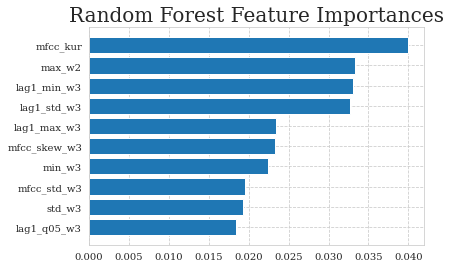

In [202]:
nbr_features = 10
tree_feature_importances = model_emotion_subset.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [154]:
X_train_es_fi = np.array(df_train_subset_e[vars_es])
X_test_es_fi = np.array(df_test_subset_e[vars_es])

In [155]:
randomforest_emotion_subset_fi = random_forest(X_train_es_fi, y_train_es)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [156]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_subset_fi.best_params_))





Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 158, 'max_features': 'sqrt', 'min_samples_leaf': 0.10747798883573778, 'min_samples_split': 0.6423103557190397}


In [157]:
model_emotion_subset_fi = RandomForestClassifier(min_samples_split = 0.6423103557190397, 
                                    min_samples_leaf = 0.10747798883573778, 
                                    max_features = 'sqrt', 
                                    max_depth = 158,
                                    criterion = 'log_loss'
                                    )
model_emotion_subset_fi.fit(X_train_es_fi,y_train_es)

RandomForestClassifier(criterion='log_loss', max_depth=158,
                       min_samples_leaf=0.10747798883573778,
                       min_samples_split=0.6423103557190397)

In [158]:
y_pred_rf_es_fi = model_emotion_subset_fi.predict(X_test_es_fi)

In [159]:
print(classification_report(y_test_es, y_pred_rf_es_fi))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        96
           1       0.76      0.74      0.75        96

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



In [160]:
# vocal_channel

vocal_channel_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
vocal_channel_metrics_b.loc["Accuracy"] = [None, None, None, None]
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
vocal_channel_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [182]:
vocal_channel_metrics_b.loc["Accuracy"][1] = accuracy_vc
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_vc

In [189]:
vocal_channel_metrics_b

,LG,RF,DTB,AB
Accuracy,ciao,0.94391,None,None
F1-Score (Weighted-Average),None,0.944193,None,None


In [186]:
# sex

sex_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
sex_metrics_b.loc["Accuracy"] = [None, None, None, None]
sex_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
sex_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [187]:
sex_metrics_b.loc["Accuracy"][1] = accuracy_s
sex_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_s

In [190]:
sex_metrics_b

,LG,RF,DTB,AB
Accuracy,None,0.823718,None,None
F1-Score (Weighted-Average),None,0.81848,None,None


In [191]:
# emotional_intensity

emotional_intensity_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotional_intensity_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotional_intensity_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [194]:
emotional_intensity_metrics_b.loc["Accuracy"][1] = accuracy_ei
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_ei

In [195]:
emotional_intensity_metrics_b

,LG,RF,DTB,AB
Accuracy,None,0.753205,None,None
F1-Score (Weighted-Average),None,0.753568,None,None


In [196]:
# emotion

emotion_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotion_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotion_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotion_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [197]:
emotion_metrics_b.loc["Accuracy"][1] = accuracy_e
emotion_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_e

In [198]:
emotion_metrics_b

,LG,RF,DTB,AB
Accuracy,None,0.458333,None,None
F1-Score (Weighted-Average),None,0.441873,None,None
